## Problem Statement 
### You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes:

- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount

## STEP #0: LIBRARIES IMPORT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STEP #1: IMPORT DATASET

In [6]:
df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [7]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## STEP #2: VISUALIZE DATASET

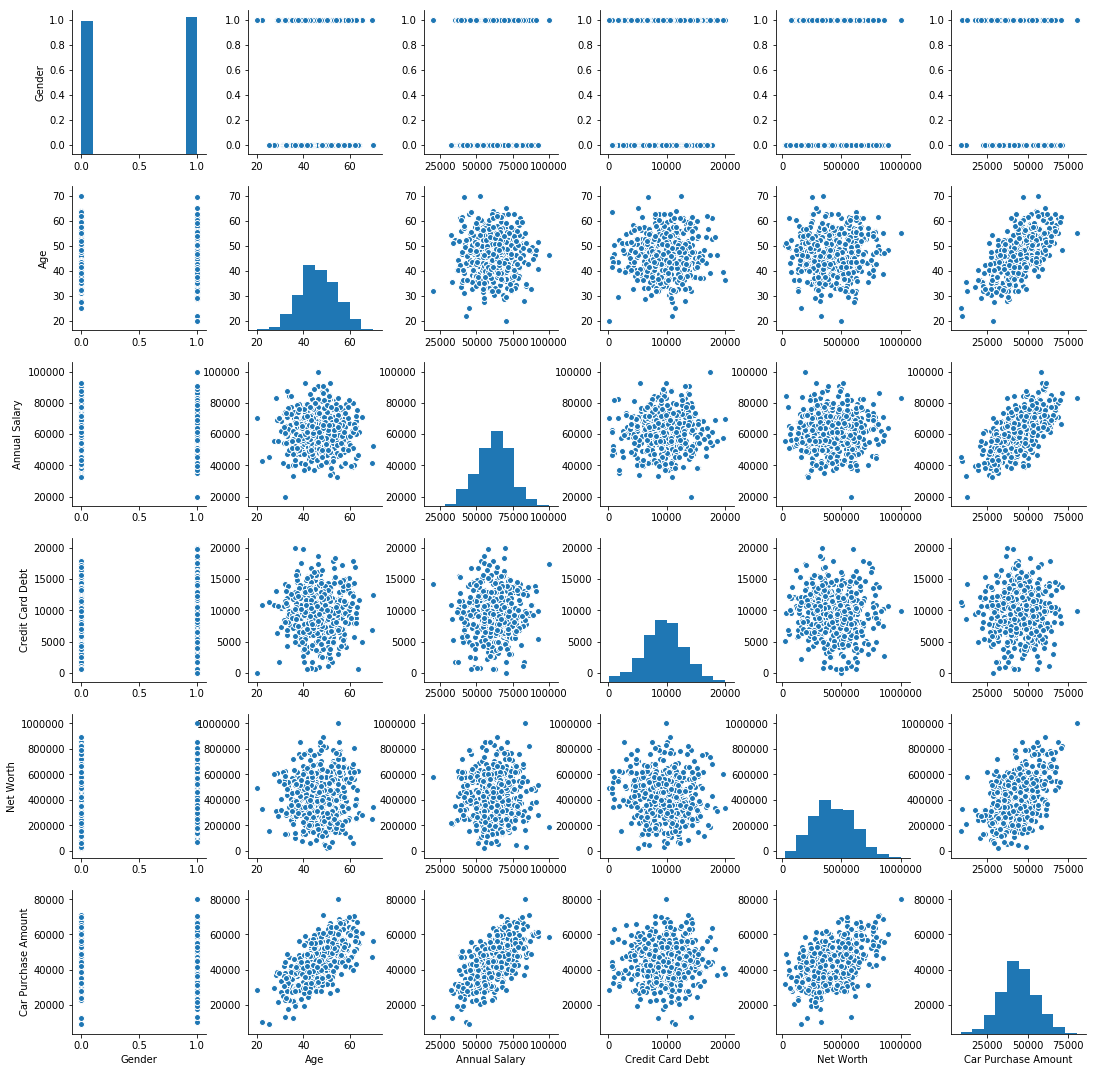

In [8]:
sns.pairplot(df)

## STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [9]:
X = df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [21]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [41]:
y = df['Car Purchase Amount']
y.shape

(500,)

In [13]:
X.shape

(500, 5)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [18]:
scaler.data_range_

array([1.00e+00, 5.00e+01, 8.00e+04, 1.99e+04, 9.80e+05])

In [20]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [26]:
print(X_scaled[0,:])

[0.         0.4370344  0.53515116 0.57836085 0.22342985]


In [27]:
y.shape

(500,)

In [42]:
y=y.values.reshape(-1,1)

In [43]:
y.shape

(500, 1)

In [44]:
y[0,:]

array([35321.45877])

In [45]:
y_scaled = scaler.fit_transform(y)

In [46]:
y_scaled[0,:]

array([0.37072477])

## STEP#4: TRAINING THE MODEL

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=.25)

In [48]:
X_train.shape

(375, 5)

In [49]:
X_test.shape

(125, 5)

In [51]:
!pip install tensorflow

In [53]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25 , input_dim=5,activation='relu'))
model.add(Dense(25 , activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
epoch_hist = model.fit(X_train,y_train,batch_size=25,epochs=20,verbose=1,validation_split=.2)

Train on 300 samples, validate on 75 samples
Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0756 - val_loss: 0.0285
Epoch 2/20
300/300 [==============================] - 0s 87us/step - loss: 0.0274 - val_loss: 0.0192
Epoch 3/20
300/300 [==============================] - 0s 110us/step - loss: 0.0202 - val_loss: 0.0126
Epoch 4/20
300/300 [==============================] - 0s 100us/step - loss: 0.0133 - val_loss: 0.0096
Epoch 5/20
300/300 [==============================] - 0s 107us/step - loss: 0.0108 - val_loss: 0.0083
Epoch 6/20
300/300 [==============================] - 0s 127us/step - loss: 0.0088 - val_loss: 0.0067
Epoch 7/20
300/300 [==============================] - 0s 123us/step - loss: 0.0068 - val_loss: 0.0052
Epoch 8/20
300/300 [==============================] - 0s 133us/step - loss: 0.0052 - val_loss: 0.0041
Epoch 9/20
300/300 [==============================] - 0s 123us/step - loss: 0.0041 - val_loss: 0.0037
Epoch 10/20
300/300 [===================

## STEP#5: EVALUATING THE MODEL

In [59]:
dir(epoch_hist)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [61]:
epoch_hist.history.keys()

dict_keys(['val_loss', 'loss'])

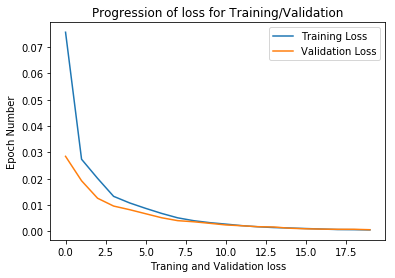

In [64]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])


plt.title('Progression of loss for Training/Validation')
plt.xlabel('Traning and Validation loss')
plt.ylabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [86]:
X_Testing = np.array([[1, 32, 90000, 200085, 0]])

In [87]:
y_predict = model.predict(X_Testing)
y_predict.shape

(1, 1)

In [88]:
print('Expected Purchase Amount=', y_predict[:,0])

Expected Purchase Amount= [41614.324]


In [89]:
y_predict

array([[41614.324]], dtype=float32)